# My First Convolutional Neural Network

## CIFAR-10

#### 실습목표<br>
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [ ]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras import layers, models
from tensorflow.keras import backend

import random as rd
from sklearn.metrics import accuracy_score

### Data Loading

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 4835
다음 그림은 Truck 입니다.


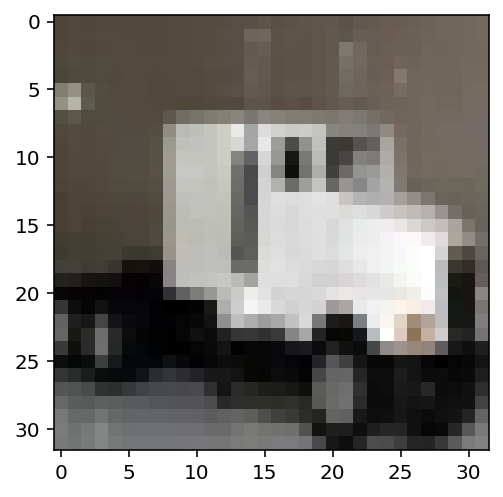

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

In [ ]:
mean_v, std_v = train_x.mean(), train_x.std()

In [ ]:
train_x = (train_x - mean_v) / std_v

In [ ]:
train_x.mean(), train_x.std()

(-2.5247951877342226e-17, 1.0000000000000022)

In [ ]:
test_x = (test_x - mean_v) / std_v

### Y : One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
class_n = len(np.unique(train_y))

In [ ]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [ ]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 10))

### 코드를 완성해주세요!

#### **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**

**자유롭게 먼저 해보는 것을 추천**

**구조를 따라서 코딩을 한다면..**

0. Functional, Sequential 중 택일
1. 인풋레이어
1. Convolution : 필터수 32개, 사이즈(3, 3), same padding
2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 25% 비활성화
1. Convolution : 필터수 64개, 사이즈(3, 3), same padding
2. Convolution : 필터수 64개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 25% 비활성화
6. Flatten( )
7. Fully Connected Layer : 노드 1024개
3. BatchNormalization
5. DropOut : 35% 비활성화
9. 아웃풋레이어

* EarlyStopping 의 옵션도 조절해보자.

In [ ]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

In [ ]:
## Sequential API

# 1. 세션 클리어
clear_session()

# 2. 모델 발판 생성
model = Sequential()

# 3. 레이어 블록 조립
# 인풋레이어
model.add( Input(shape=(32,32,3)) )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu') )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu') )
# BatchNormalization
model.add( BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )
# DropOut : 25% 비활성화
model.add( Dropout(0.25) )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu') )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu') )
# BatchNormalization
model.add( BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )
# DropOut : 25% 비활성화
model.add( Dropout(0.25) )
# Flatten( )
model.add( Flatten() )
# Fully Connected Layer : 노드 1024개
model.add( Dense(1024, activation='relu') )
# BatchNormalization
model.add( BatchNormalization() )
# DropOut : 35% 비활성화
model.add( Dropout(0.35) )
# 아웃풋레이어
model.add( Dense(10, activation='softmax') )

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [ ]:
## Functional API

# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기
# 인풋레이어
il = Input(shape=(32,32,3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(il)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 1024개
hl = Dense(1024, activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

#### 모델 학습

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
history = model.fit(train_x, train_y, validation_split=0.2, epochs=1000, verbose=1,
                    callbacks=[es])

Epoch 1/1000
1250/1250 [==============================] - 21s 7ms/step - loss: 1.5903 - accuracy: 0.4784 - val_loss: 1.1360 - val_accuracy: 0.6025
Epoch 2/1000
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0706 - accuracy: 0.6284 - val_loss: 1.0709 - val_accuracy: 0.6401
Epoch 3/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9160 - accuracy: 0.6824 - val_loss: 0.8358 - val_accuracy: 0.7080
Epoch 4/1000
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8196 - accuracy: 0.7147 - val_loss: 0.8278 - val_accuracy: 0.7204
Epoch 5/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7544 - accuracy: 0.7351 - val_loss: 0.7208 - val_accuracy: 0.7524
Epoch 6/1000
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6680 - accuracy: 0.7697 - val_loss: 0.8132 - val_accuracy: 0.7386
Epoch 7/1000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6080 - accuracy: 0.7875 - val_loss: 0.7141 

### 성능 평가

In [21]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

100/100 [==============================] - 1s 5ms/step - loss: 0.6718 - accuracy: 0.7968
Test Loss : 0.671807,  Test Accuracy : 79.680%


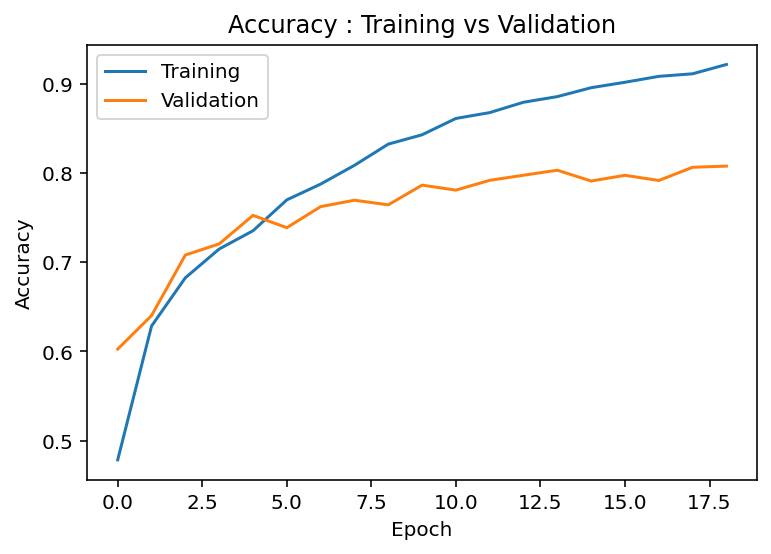

In [22]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

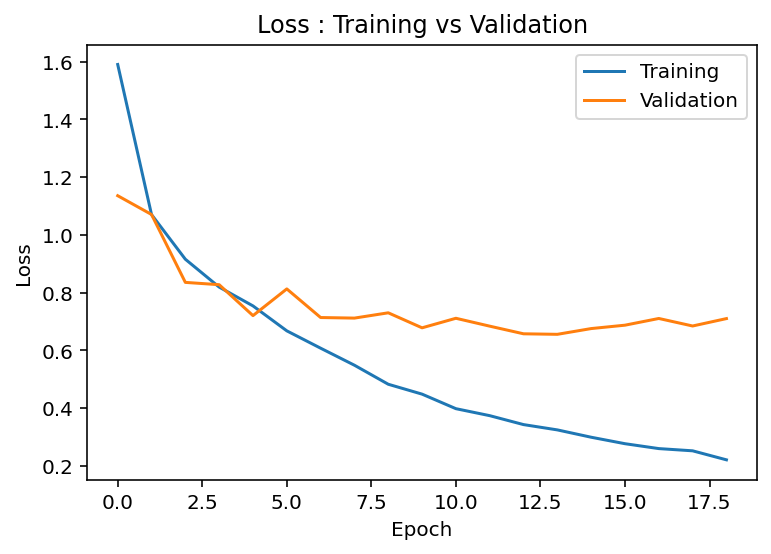

In [23]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [24]:
# 원핫인코딩 해제
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [25]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

CNN
트레이닝 정확도 : 94.63%
테스트 정확도 : 79.68%


id = 8047
다음 그림은 Airplane 입니다.
모델의 예측 : Bird
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 71.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 2.0, 'Horse': 0.0, 'Ship': 24.0, 'Truck': 0.0}
틀렸어요


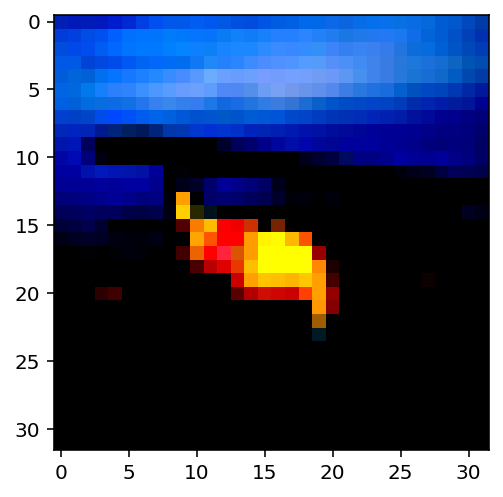

In [30]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 7439
다음 그림은 Dog 입니다.
모델의 예측 : Cat
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 0.0, 'Cat': 95.0, 'Deer': 1.0, 'Dog': 2.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


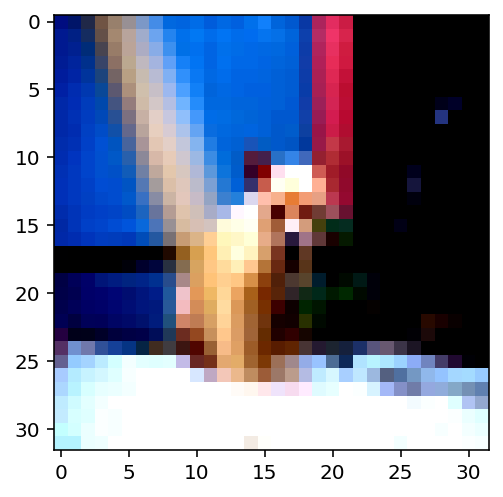

In [33]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()